# LAB2.3 Creating embeddings from text in some language


Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

In this notebook, we are going to show how you can create word embeddings from a text collection for a specific language:

<ol>
<li>Obtain a text corpus from the web. We will use the Leipzig Corpora Collection that contains texts in many languages and was already preprocessed.
<li>Tokenize the text to get the individual words in sentences as a list. We use the NLTK toolkit and a specific tokenization function to do that.
<li>Create an embedding model from the tokenized text using the Gensim package
<li>Demonstrate how to use the embedding model
<li>Show how the word embedding space can be visualised
</ol>

https://radimrehurek.com/gensim/auto_examples/index.html#core-tutorials-new-users-start-here

## 1. Obtaining text from the Leipzig Corpora collection

The Leipzig corpora collection has corpora for over 250 languages. These corpora are collected from Wikipedia, news and web crawls. Download a corpus in a language from:

http://wortschatz.uni-leipzig.de/en/download/

We will use the 'eng_news_2005_1M-text' corpus in this notebook. 

Unpack the compressed file somewhere on your computer. You will see it contains a number of files in a folder that have been created by the Leipzig NLP group from the sources. For example, the files "...-sources.txt" contain the list of URLs from which the text was obtained preceded by an identifier and followed by the date of crawling:

```
1	http://davesipaq.com/articles/iPAQ_Plustek_portable_scanning_solution.html	2005-06-12
2	http://www.independent.com/cover/Cover959.htm	2005-04-08
3	http://www.insidebayarea.com/ci_2736737?rss	2005-05-15
4	http://www.dailycollegian.com/vnews/display.v/ART/2005/05/13/4282dbfadd830	2005-05-12
5	http://p2pnet.net/story/4856	2005-05-16
6	http://www.imf.org/external/np/tr/2005/tr050324a.htm	2005-04-09
```

The "...-words.txt" file contains the vocabulary of words with their frequency, e.g.:

```
452	law	5521
453	making	5514
454	record	5511
455	whether	5496
456	times	5488
457	St.	5485
458	scored	5484
459	taken	5484
```

We are going to use the file named "...-sentences.txt", which contain a sentence on each line preceded by an identifier, e.g.:

```
1	I didn't know it was police housing," officers quoted Tsuchida as saying.
2	You would be a great client for Southern Indiana Homeownership's credit counseling but you are saying to yourself "Oh, we can pay that off."
3	He believes the 21st century will be the "century of biology" just as the 20th century was the century of IT.
4	They even call the civil rights organization a bit hypocritical.
```

Our goal is to use these sentences to create word embeddings. To be able to do that we need to process this file line by line, obtain the tokens from each sentence and separate punctuation from each token. We are going to do this with the NLTK toolkit and define a specific function called 'preprocess_rawtext' that does all the work for us.

What is a function? A function is an ordered sequence of commands packaged into a group (like a recipe) with a name and possibly parameters between round brackets. So far you have been calling functions for instances of classes such as string or list that have been defined by other programners. You can however also define functions yourself. This is specifically useful if:

<ol>
<li> the code becomes too long and you want to group smaller steps into higher level steps without bothering about what happens inside: e.g. like playing music instead of pushing piano keys
<li> code needs to be applied more than once and you do not want to repeat the code and make sure it is consistent across the repeated calls.
</ol>
    
The function that we define below calls other functions as well that we also need to define, so you can see it is definitely a higher-order function. 

Once defined, we only need to apply this function to a local file on our disk to carry out a whole series of instructions and we can easliy do this many times for all kinds of files in the same format, e.g. downloaded from the Leipzig website. The function guarantees that the same process is applied each time.

The next cell contains the processing function. After your run the cell in your notebook, the function is available to do the work for you. This means it is defined but it has not been used yet. For that we need to apply it to something. We do that later.

For now, you can try to read and understand the function or just call it when you need it.

## Preprocessing function

In [2]:
# We use the NLTK tokenization function to process the text
# For this we import the modules word_tokenize and sent_tokenize

from nltk.tokenize import word_tokenize, sent_tokenize
import string

#Function to remove punctuation from word tokens, 
#Takes a list of tokens as input

#Note that these functions only work if you also imported NLTK and string before calling the function
def remove_punct(tokens):
    # punct is a string with all punctuation tokens: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    punct = string.punctuation
    # empty list in which we put the clean tokens
    tokens_clean = []

    # Iterate over all characters in tokens 
    # and only keeps them if not in punct
    for t in tokens:
        if t not in punct:
            tokens_clean.append(t)
    # The result is a list with the cleaned tokens
    return tokens_clean

# The Leipzig corpus is already processed into sentences, so we do not need to split the text into sentences
# We can read it line by line but 
# we need to skip the first token in each line which is the identifier and not regular text

# Takes as input parameter the path to a file
def preprocess_leipzig_sentences(file):
    clean_sentences = []
    
    with open(file, "r") as i:
            for sentence in i:
                # We downcase each sentence, word_tokenize it with NLTK
                tokens = word_tokenize(sentence.lower())
                # We apply our custom remove_punct function and exclude the first token
                tokens_clean = remove_punct(tokens[1:]) # we skip the first token which is the identifier.
                # We add the clean tokens as a list to the list of sentences
                clean_sentences.append(tokens_clean)
                
    # The result is a list of lists, each representing the tokens of a sentence as elements
    return clean_sentences

# If you want to process other text than the Leipzig corpus that is not split into sentences,
# you can call the next function. The difference is:
# - we read the complete file as a text string
# - we apply the NLTK sent_tokenize function to the get a list of sentences
# - we do not need to remove the identifier
def preprocess_rawtext(file):
    clean_sentences = []

    with open(file) as infile:
        text = infile.read()
        
    sentences = sent_tokenize(text.strip())

    for sentence in sentences:
        tokens = word_tokenize(sentence.lower())
        tokens_clean = remove_punct(tokens)
        clean_sentences.append(tokens_clean)
    return clean_sentences


We now apply the above custom function to the Leipzig text corpus file with the sentences.

You need to adapt the path_to_the_corpus_file to the correct location of the file on your computer.
If the path is wrong you get an error message!

It takes a while before the whole file is processed. Get a coffee or cup of tea!

In [3]:
#eng_news_2005_1M-sentences.txt
path_to_the_corpus_file='/Users/piek/Desktop/t-ONDERWIJS/data/leipzig-corpora/eng_news_2005_1M-text/eng_news_2005_1M-sentences.txt'
text_leipzigcorpus_clean = preprocess_leipzig_sentences(path_to_the_corpus_file)

We can inspect text_leipzigcorpus_clean by asking for its length and printing a small sample, in this case sentence 201 till 208. 

In [4]:
print('Number of sentences=',len(text_leipzigcorpus_clean))
#we print a few sentences to see how it looks like
print(text_leipzigcorpus_clean[201:208])

Number of sentences= 1000000
[['his', 'forehead', 'is', 'fractured', 'in', 'several', 'places', 'and', 'his', 'brain', 'and', 'one', 'of', 'his', 'lungs', 'are', 'bruised', 'she', 'said'], ["''", 'their', 'reputation', 'is', 'totally', 'vindicated', "''", 'loevy', 'said'], ['he', 'also', 'was', 'administratively', 'charged', 'with', 'breaking', 'state', 'law', 'lying', 'and', 'failing', 'to', 'report', 'information', 'to', 'the', 'department', 'in', 'the', 'jude', 'beating'], ["''", 'the', 'mta', 'were', 'directed', 'to', 'make', 'certain', 'amendments', 'to', 'their', 'constitution', 'to', 'ensure', 'clubs', 'are', 'directly', 'affiliated', 'to', 'the', 'national', 'body', 'with', 'voting', 'rights', "''", 'said', 'elyas'], ['both', 'last', 'raced', 'in', 'the', 'florida', 'derby', 'on', 'april', '2'], ['they', 'were', 'fifth', 'last', 'year', 'in', 'prague', 'fourth', 'in', '2003', 'at', 'helsinki', 'and', 'fifth', 'in', '2002', 'at', 'goteborg', 'sweden'], ['nicklaus', 'said', 'fare

## Training word embeddings

To train a language model with word embeddings, we will use the **gensim** package again. 

In order to build the word embeddings through gensim, we are going to use the Word2Vec function that is included in gensim. Word2Vec is the Google package that provided a break-through in the performance of embeddings (Mikolov et al. 2013). Check its citations in Google scholar!

    Mikolov, Tomas, Ilya Sutskever, Kai Chen, Greg S. Corrado, and Jeff Dean. 
    "Distributed representations of words and phrases and their compositionality." 
    In Advances in neural information processing systems, pp. 3111-3119. 2013.

When we train our embeddings, gensim allows us to set a number of parameters. The most important of these are `min_count`, `window`, `size` and `sg`:

* `min_count` is the minimum frequency of the words in our corpus. For infrequent words, we just don't have enough information to train reliable word embeddings. It therefore makes sense to set this minimum frequency to at least 10. In these experiments, we'll set it to 100 to limit the size of our model even more and to speed up things.
* `window` is number of words to the left and to the right that make up the context that word2vec will take into account to make predictions.
* `size` is the dimensionality of the word vectors. This is generally between 100 and 500. You often have to make a trade-off: embeddings with a higher dimensionality are able to model more information, but also need more data to train.
* `sg`: there are two algorithms to train word2vec: skip-gram and CBOW. Skip-gram tries to predict the context on the basis of the target word; CBOW tries to find the target on the basis of the context. By default, Gensim uses CBOW (`sg=0`).

We'll investigate the impact of some of these parameters later.

The next command creates an embedding model from our cleaned corpus. The model is assigned to the variable 'englishleipzig_w2v'(any name will do) and can be used next in this notebook. We also save the embedding model to disk as 'txt' file and as 'binary' data (bin) so that we can load it later and do not need to build the model over and over again.

In [6]:
# You need to do the next commands only once. When you have succesfully created and saved the embeddings you can load them afterwards
from gensim.models import Word2Vec
englishleipzig_w2v = Word2Vec(text_leipzigcorpus_clean, vector_size=100, window =4, min_count =100)

The resulting model has a lot of different functions, explained in the documentation of gensim. Please note that everytime we train a model, even with the same data, the resulting embeddings will be slightly different. This is because the neural network will use different random seeds to initialize its weights. The details of this go beyond what you will learn in this lab, but keep in mind that when you run this notebook your results might be different in the details, but the general trends should hold. For example, the similarity scores between 'woman' and 'king' might not be exactly the same, but the most similar words for 'king' will be mostly the same. 

After the model is built, you can save it to disk for future usage. This may be handy if for some reason the notebook is killed or gets stuck and do you do not like drinking too much tea.

We use the function *wv.save_word2vec_format* to save the model. I am storing it in a subfolder "models". Make sure the folder exist in the path you specify.

We can save the model as a text file or as a binary file. The binary file loads faster but you could have problems porting it from machine to machines with different OS. The text file you can load in a text editor and inspect!

In [7]:
englishleipzig_w2v.wv.save_word2vec_format('/Users/piek/Desktop/t-ONDERWIJS/data/leipzig-corpora/models/eng_news_2005_1M-sentences.txt')
englishleipzig_w2v.wv.save_word2vec_format('/Users/piek/Desktop/t-ONDERWIJS/data/leipzig-corpora/models/eng_news_2005_1M-sentences.bin', binary=True)

If you have a powerful plain text editor, you can open the txt file and inspect it. You can also use the command line and type the following command:

In [8]:
%cat /Users/piek/Desktop/t-ONDERWIJS/data/leipzig-corpora/models/eng_news_2005_1M-sentences.txt | more

12339 100
the 0.84101564 0.31274566 -0.092482425 1.676692 -0.2265026 -0.12760705 0.21681546 -1.8408632 0.12206983 1.3459616 -1.1967053 -0.37336367 1.0244739 0.25631824 1.3296152 -0.6487012 0.7483092 0.7401807 -0.37828237 0.22241691 0.87980926 0.9738888 -0.096674755 -0.59405226 0.5670252 -1.4957238 -1.2425002 1.2754202 -0.36064124 0.5165626 0.6754657 0.87450176 -0.354025 -0.68815213 -0.075431466 -0.09360485 1.0135231 0.27565974 -0.06573858 0.4166332 -1.0835739 0.46000254 -0.3805741 -0.68302447 -0.42822224 0.9958035 1.0108186 0.3833383 0.66979325 -0.021154916 -0.6631298 0.83084375 -0.6728881 0.17245671 0.6757783 -0.29652214 -0.34717903 -1.0401422 0.10738955 0.6100633 -0.06913846 1.4818866 -0.80360824 0.9319066 1.5362161 -0.24884757 -0.5205021 -1.4068332 0.21553572 1.3008745 -0.30565324 0.6018981 -0.36598688 -0.8411533 -0.24854805 0.9356407 0.8845694 0.49973598 1.3192967 -0.38670036 -0.53026265 -1.7485405 -0.08700864 1.7158558 -0.8100795 0.86921036 0.54335797 -1.4915612 0.1450094 0.530090

Note that you need to stop the previous cell manually in this notebook because the "more" command only shows the beginning of the file and waits for an enter to continue or ctrl-c for cancel. You stop the cell by clicking on the square next to the play symbol in the menu of the notebook.

The first line has two numbers: the first is the size of the vocabulary and the second is the number of dimensions or the length of the vectors. Both depend on the parameters you used to build the model. The file contains a line for each word with its embedding representation. Depending on the parameters used, you may see the embeddings for the very frequent words "the" and "to" as the first lines.

## Using word embeddings

Now we saved our model to disk, we can load it any time and use it. The next time you launch this notebook, you do not need to collect and preprocess the corpus and build a model from it. You can load the model directly from the location where you saved it. That's what we are going to do now.

In [9]:
# How to load a stored model:
from gensim.models import KeyedVectors

# You can load it either as text or as binary data. 
#The latter is more efficient but you may not be able to port it from machine to machine.
englishleipzig_w2v = KeyedVectors.load_word2vec_format('/Users/piek/Desktop/t-ONDERWIJS/data/leipzig-corpora/models/eng_news_2005_1M-sentences.txt') 

Notice that loading is much faster than building! Let's check some of the properties of the englishleipzig_w2v model: 

In [11]:
# Show some properties of our model. Notice these are also in the text file.
print('Vector size =', englishleipzig_w2v.vector_size)
print('Vocabulary size =', len(englishleipzig_w2v.key_to_index))

Vector size = 100
Vocabulary size = 12339


We have limited the dimensions to '100' which is the vector size and the vocabulary is much smaller than the Wikipedia vocabulary and even smaller than WordNet. We can now use any word from the vocabulary as a key to obtain the vector:

In [12]:
king_vector = englishleipzig_w2v["king"]
print(len(king_vector))
print(king_vector)

100
[ 0.36683878  1.817855    0.53608    -0.01084493  0.43342495 -0.30824918
  0.7556272  -0.6062736   0.01847764 -0.5965105  -0.7171212  -0.47916403
 -1.2712703   0.22505324  0.5641448  -0.24498962  1.4841001  -0.2875216
 -0.06578981 -1.0712711   1.0293478   0.7821674   1.049942   -0.7293171
 -0.2044628  -0.8517396  -0.23206663 -1.1490167   0.29358172 -0.12079515
  0.6832222   0.0173613   0.2119491  -0.05244386  0.10576901 -0.20513475
  0.42756015  0.90224946  1.1571835  -1.3650585   1.4371138  -2.3147695
 -0.09933221  0.00951408  0.86696273 -1.291456    0.261761   -0.21777952
 -0.8456698  -0.4542094  -0.9576649   0.40451214 -0.9508456  -0.6995556
  0.45528886 -0.24650642  0.5413054   0.41877893 -0.37877363 -0.22210082
 -1.1915184  -0.25811037  0.28123018 -0.27535358 -0.87213624  0.5075795
  0.9297709   0.9489309  -1.773026    0.6300722  -1.5242121  -0.2783702
  1.07645     0.5452422   0.5581287   0.5143565   0.17606749  0.3151988
 -0.8846335  -1.2565025   0.22325279 -1.3122814  -0.28

We see we get a dense vector with values for all 100 dimensions.

We can also easily find the similarity between two words. Similarity is measured as the cosine between the two word embeddings, and ranges between -1 and +1. The higher the cosine, the more similar two words are. As expected, the figures below show that *king* is closer to *queen* than to *coffee*.

In [13]:
print(englishleipzig_w2v.similarity("king", "queen"))
print(englishleipzig_w2v.similarity("king", "coffee"))

0.6937485
0.065235995


In a similar vein, we can find the words that are most similar to a target word. The words with the most similar embedding to *king* are all similar titles (such as *prince*  and *queen*) or they are semantically related to royalty.

In [14]:
englishleipzig_w2v.similar_by_word("king", topn=10)

[('prince', 0.7358289361000061),
 ('buchanan', 0.7031980752944946),
 ('queen', 0.6937484741210938),
 ('elizabeth', 0.6648553609848022),
 ('harry', 0.6619515419006348),
 ('rainier', 0.6589007377624512),
 ('caroline', 0.6577759385108948),
 ('stephens', 0.6567960977554321),
 ('albert', 0.6432297229766846),
 ('anne', 0.6405280828475952)]

Note that this model was trained from the Leipzig news corpus for English, which is not that big! Companies such as Google, Amazon and Facebook train their models on many magnitudes more data. Much bigger corpora in many languages can be found at: https://commoncrawl.org

Note that training a model on such data sets also requires a powerful computing infrastructure.

Interestingly, we can look for words that are similar to a set of words and dissimilar to another set of words at the same time. This allows us to look for analogies of the type *king is to man like ... is to woman*.

In [15]:
englishleipzig_w2v.most_similar(positive=['woman', 'king'], negative=["man"], topn=10)

[('queen', 0.7207211256027222),
 ('anne', 0.673953115940094),
 ('elizabeth', 0.6680075526237488),
 ('caroline', 0.6593606472015381),
 ('prince', 0.6497645378112793),
 ('mary', 0.6441512703895569),
 ('buchanan', 0.6351933479309082),
 ('diana', 0.6321902275085449),
 ('rainier', 0.6272236704826355),
 ('stephens', 0.6266393065452576)]

We see that *queen* (scoring slightly higher) and *prince* (scoring significantly lower). More female names are included and male names are scoring lower or even disappeared.

## Words are not word meanings!

What happens with ambiguous words?

If we take an ambiguous word such as **mouse**, we get devices but not similar animal terms such as 'rat'.

In [16]:
englishleipzig_w2v.most_similar(positive=["mouse"], topn=10)

[('keyboard', 0.6706250309944153),
 ('colour', 0.6532005071640015),
 ('monkey', 0.6466478705406189),
 ('pie', 0.6428298354148865),
 ('blade', 0.6363875865936279),
 ('soap', 0.6206682324409485),
 ('browser', 0.6161876320838928),
 ('clips', 0.6158952116966248),
 ('dish', 0.6099341511726379),
 ('worm', 0.6089330911636353)]

If we however subtract the vector for **computer** or **keyboard**, we can try to get more animal related terms

In [17]:
englishleipzig_w2v.most_similar(positive=["mouse"], negative=["computer"], topn=10)

[('dark', 0.5245575308799744),
 ('bright', 0.4804314970970154),
 ('smell', 0.4789022207260132),
 ('lovely', 0.4683320224285126),
 ('beans', 0.4573015570640564),
 ('gray', 0.4571860432624817),
 ('reminiscent', 0.45305588841438293),
 ('pink', 0.4528804421424866),
 ('roses', 0.45275360345840454),
 ('lit', 0.4464976191520691)]

Not really a good result although *keyboard* is no longer on top. This may be due to the size of the corpus used and the settings that were used to build it.

Finally, we can present the word2vec model with a list of words and ask it to identify the odd one out. It then uses the word embeddings to identify the word that is least similar to the other ones. For example, in the list *car, bike, bus, coffee*, it correctly identifies *coffee* as the odd one out. In the list *coffee, car, tea, milk*, it correctly singles out *car*.

In [18]:
print(englishleipzig_w2v.doesnt_match("car bike bus coffee".split()))
print(englishleipzig_w2v.doesnt_match("coffee bus bike tea milk".split()))

coffee
bus


## Plotting embeddings [Advanced]

Let's now visualize some of our embeddings. To plot embeddings with a dimensionality of 100 or more, we first need to map them to a dimensionality of 2. We do this with the popular [t-SNE](https://lvdmaaten.github.io/tsne/) method. T-SNE, short for t-distributed Stochastic Neighbor Embedding, helps us visualize high-dimensional data by mapping similar data to nearby points and dissimilar data to distance points in the low-dimensional space.

T-SNE is included in [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). If you have not installed scikit-learn you need to do that first. Follow the instructions at: https://scikit-learn.org/stable/install.html to do so or run `conda install scikit-learn`. Note that we will use scikit learn anyway next week.

To run the TSNE package within Scikit-learn, we just have to specify the number of dimensions we'd like to map the data to (`n_components`), and the similarity metric that t-SNE should use to compute the similarity between two data points (`metric`). We're going to map to 2 dimensions and use the cosine as our similarity metric. Additionally, we use PCA as an initialization method to remove some noise and speed up computation. The [Scikit-learn user guide](https://scikit-learn.org/stable/modules/manifold.html#t-sne) contains some additional tips for optimizing performance. 

Plotting all the embeddings in our vector space would result in a very crowded figure where the labels are hardly legible. Therefore we'll focus on a subset of embeddings by selecting the 'n' most similar words to a target word. In the example below, we set the target word to 'moon' and we draw only the graph for the 50 most related words.

In order to visualise a model and its words we need an auxiliary function that is given below. Run the cell below to make this function 'tsne_plot_target_word' available to your notebook. 

You might also need to install matplotlib (a library for plotting) and pandas (a library for data analysis). You can do so in the usual way:

`conda install matplotlib`

`conda install pandas`

In [19]:
%conda install matplotlib
%conda install pandas

Solving environment: done

## Package Plan ##

  environment location: /Users/piek/opt/anaconda3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39hecd8cb5_0         884 KB
    ------------------------------------------------------------
                                           Total:         884 KB

The following packages will be UPDATED:

  conda                               4.14.0-py39hecd8cb5_0 --> 22.9.0-py39hecd8cb5_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2022.9.2~ --> pkgs/main::ca-certificates-2022.07.19-hecd8cb5_0
  certifi            conda-forge/noarch::certifi-2022.9.24~ --> pkgs/main/osx-64::certifi-2022.9.14-py39hecd8cb5_0
  openssl            conda-forge::openssl-1.1.1q-hfe4f2af_0 --> pkgs/main::openssl-1.1.1q

We next define an auxiliary function that given a model and a selection of similar words generates the 2-dimentional TSNE space and saves it to a file with name of the target_word and the number of neighbours.

In [20]:
#https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot_target_word(model, selected_words, target_word):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for i, word in enumerate(selected_words):
        tokens.append(model[i])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.title('Word embedding space:'+target_word)
    plt.savefig(target_word+str(len(selected_words))+'_englishleipzig_w2v.pdf', dpi=600, transparent='true', bbox_inches='tight')
    plt.show()

In [21]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

# We select a set of 50 words most similar to 'moon' and store the result as 'selected_words'
count=50
target_word = "moon"
selected_words = [w[0] for w in englishleipzig_w2v.most_similar(positive=[target_word], topn=count)]
print('The 50 most similar words to "moon" in a our model:', selected_words)    


The 50 most similar words to "moon" in a our model: ['planet', 'earth', 'saturn', 'mars', 'canvas', 'broadway', 'stone', 'balcony', 'carpet', 'tail', 'sand', 'pie', 'brick', 'cave', 'den', 'surface', 'cloud', 'grass', 'sunset', 'jungle', 'grill', 'barn', 'lounge', 'statue', 'shade', 'spacecraft', 'runway', 'dock', 'flower', 'porch', 'sun', 'patio', 'desert', 'asphalt', 'tree', 'sky', 'sculpture', 'rock', 'deck', 'shelf', 'garden', 'turf', 'alley', 'liner', 'famed', 'lion', 'cafe', 'ship', 'trek', 'oven']


Next, we obtain the vector representation for the top 50 words and create an array of vector arrays with scores for each dimension.

In [22]:
embeddings = [englishleipzig_w2v[w] for w in selected_words]

Let's inspect the first two elements. It is indeed a list with vector arrays.

In [23]:
print(embeddings[0:2])

[array([ 0.52750576,  1.0478163 , -1.5915587 ,  0.06980969,  0.15111978,
       -0.22054647,  0.30657014,  0.02314819, -0.84908473, -0.7313276 ,
       -0.8782746 ,  0.7712351 , -0.02909854,  0.79539543, -0.67670506,
        1.3722314 , -0.00826237,  0.65618825, -0.07138374,  0.5912936 ,
        1.4450148 , -0.25810412,  1.1830515 , -0.06761733, -0.12781876,
       -0.40386683, -0.1330676 ,  1.0111545 ,  0.14971012, -0.0751167 ,
       -0.4446841 , -0.8896112 ,  0.26924935,  0.5420387 , -0.09067997,
        0.4625786 , -0.8925674 , -0.28001004,  0.8510847 ,  0.03494516,
       -0.794703  ,  1.0891365 , -0.14674158, -1.4189705 , -0.3597781 ,
       -0.1110753 ,  0.24833497, -0.6334012 ,  0.16413137,  0.39118382,
       -0.70911473, -0.9784766 ,  0.8767498 , -0.02075742, -0.9017628 ,
        0.47905833,  0.15802076, -0.71691984, -0.00952871,  0.07514735,
        0.12822004,  0.40334293, -0.5787616 ,  0.0690889 , -0.2764829 ,
        0.12704921,  0.6847984 ,  0.2073928 ,  0.38328072,  0.5

Next we call the TSNE function with the parameters mentioned before and we call a fit_transform(embeddings) function to fit in our selected embeddings. This will apply the cosine similarity to all embeddings and plot these in two dimensions

In [24]:
mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)

/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Now we can apply our custom made function 'tsne_plot_target_word' to the mapped_embeddings:

/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


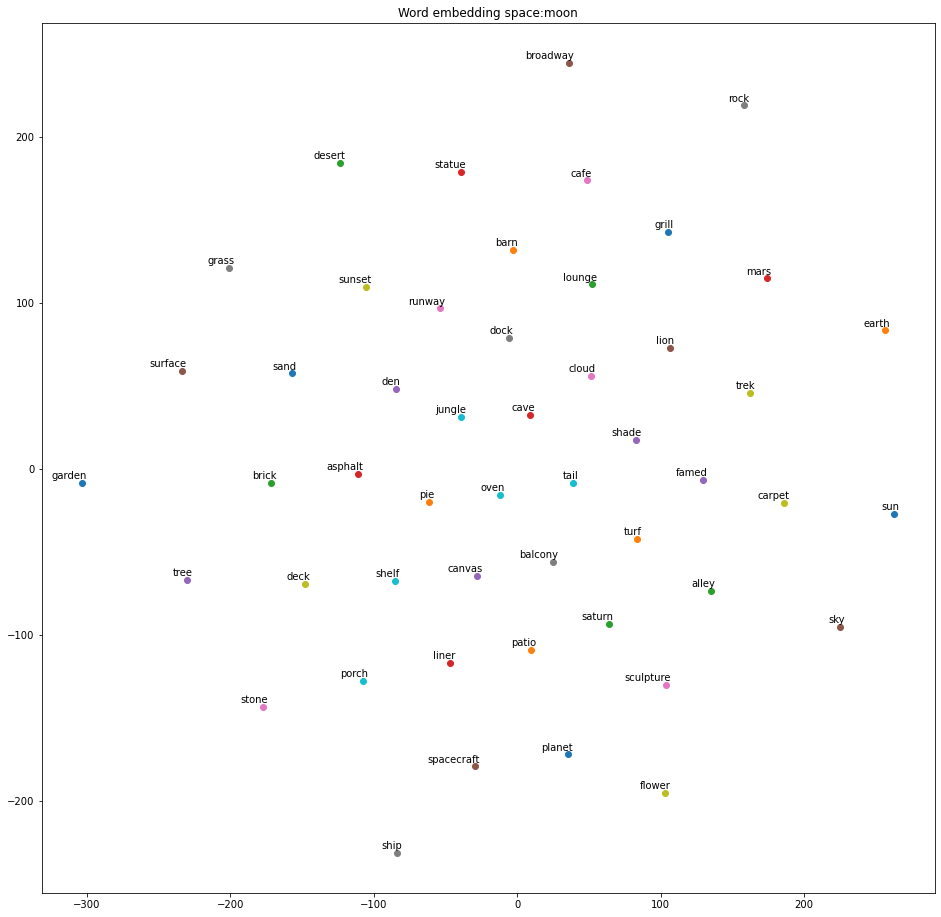

In [25]:
tsne_plot_target_word(embeddings, selected_words,target_word)

That looks nice! So our target word 'moon' is located at the coordinates [0,0]. Inspect the diagram to see what words are close. OK-ish. Perhaps, it works better with 300 dimensions!

### Displaying the full graph

To display the whole space we rebuild the word2vec model and limit the vocabulary to frequency of 500 or more and reduce the dimensions to 50. This may still take a while to complete. The result may look cluttered, which is why we save it to a PDF file to expand.

In [27]:
from gensim.models import Word2Vec
count=500

englishleipzig_w2v = Word2Vec(text_leipzigcorpus_clean, vector_size =50, window =4, min_count =count)

To save the result to disk, we need another customized function:

In [32]:
#https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model, name):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.title('Word embedding space:'+name)
    plt.savefig(name, dpi=600, transparent='true', bbox_inches='tight')
    plt.show()

We can now call the new customized function 'tsne_plot' to the full model. It took a while on my computer to save it. If you dont manage, you can inspect the PDF that is included in the LAB distribution.

In [ ]:
tsne_plot(englishleipzig_w2v, 'moon_englishleipzig_w2v.pdf')

/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


# End of notebook